<a href="https://colab.research.google.com/github/spriyakhedekar/DataScience/blob/master/tf2_Notebook_1_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensorflow 2.0: Notebook 1: 'Hello World' Deep Learning with Tensorflow 2.0  

## 1. Introduction to the Notebooks

### 1.1 What we will cover today

**What will we cover today?**
* We will: provide an introduction to the core Deep Learning Concepts;  provide an introduction to `Tensorflow 2.0`; and, provide an introduction to Computer Vision. 


**How will we go about it?**
* We will have four sessions today. The first will provide a basic introduction to Deep Learning and `Tensorflow 2.0`. The second will go in to more detail about Computer Vision. 

* Session Three will cover Transfer Learning, an important technique for developing state of the art models. Session Four will be an opportunity to put together everything you have learned and develop your own models.


**How are the sessions structured?**
* We will provide some introductory concepts and instructions at the start of session. You will then work through a notebook that will cover the topics for that session. You can do this individually or in conjunction with others around you. We will answer questions and support throughout the session. At the end of the session, we will summarise what we have learnt. 
* In addition, we are preparing some advanced topic notebooks that you can work through ifollowing today's session. They will build on the initial notebooks and provide an insight into the lower level tensorflow API.


**Can you set out all the notebooks?**
* Session 1: 'Hello World' Deep Learning with Tensorflow 2.0 (this notebook)
* Session 2: Computer Vision with CNNs 
* Session 3: Transfer Learning 

**And the Advanced Notebooks?**
* Advanced 1: Model and Layers 
* Advanced 2: Custom Training Loops 
* Advanced 3: Data Pipelines and Augmentation 
* Advanced 4: Tensors 

**What will you not cover?**
* There are certain things that we can't cover today because of time. We won't cover the maths behind Deep Learning (calculus and Linear Algebra). There won't be detailed coverage of the topics, although we will cover the main concepts and provide some follow-up reading. 
* And, we won't have exciting datasets. We will use benchmark (but slightly dated) datasets that are available via the Tensorflow 2.0 API. Our focus is on concepts and code, and this means using datasets that are available to everyone and can be trained on easily. 

**One final thing...**
* The Session 1 - 3 tutorials are based on tutorials published on the Tensorflow 2.0 website [link](https://www.tensorflow.org/beta). We have provided a lot more material than is in those tutorials, and the advanced tutorials are new.

## 2. Introduction to this Notebook

**What will we cover in this notebook?**
* This notebook will introduce the core concepts of Deep Learning. We will also start coding straightaway with `Tensorflow 2.0`.
* Let's start by loading the necessary libraries, and introducting the problem we are going to work on. 

### 2.1 Loading the Libraries

In [0]:
# we need to install tensorflow 2.0 on the google cloud notebook we have opened
!pip install -q tensorflow==2.0.0-alpha0

In [0]:
# imports future functionality that might modify modules otherwise used and make them incompatible in the future. 
# We are future proofing by importing modules that modify or replace exising modules that we may have used now 
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
# import tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [0]:
# import helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# let's print out the version we are using 
print(tf.__version__)

2.0.0-alpha0


###2.2 Introduction to our problem

**What problem are we trying to solve?**
* We will use the Fashion MNIST dataset. This is a dataset of images of clothes (you will see what the data looks like soon). The task is to train a model on this dataset so that when the model sees a new image of clothes, it classifies it correctly.
* The dataset is quite large - 60,000 images to train on and 10,000 to test on. However, the images are small and therefore its possible for us to train on easily. 


## 3. Deep Learning Conceptual Introduction 

![alt text](https://github.com/DanRHowarth/Tensorflow-2.0/blob/master/Notebook%201%20-%20Deep%20Learning%20Concepts.png?raw=true)

**What are the main concepts in Deep Learning?**

* The diagram above shows what I think are the core concepts of Deep Learning (in a supervised learning context). We will assume we are using a training set where we know the matching input and output values.
* We have a dataset that is an input to the deep learning model. We need to define how we will **process**  **input** data, if at all.
* We will define how we build our **model**. These user-defined concepts are our *hyperparameters* (things that the deep learning practioner sets). They create the total number of *parameters* that will be trained to map our input data to output values. *Parameters* are things learned by the model - they represent the *learning* in deep learning. In the case of deep learning, the parameters and weights and biases of the model. 
* We will then use our model to train on the data. We will pass our data through the model in a **forward pass**; this will provide an output value by performing mathematical operations at each of stage of our model. 
* We will **assess the performance** of our model by comparing this output value with the actual value to generate a *loss* value. The loss will represent the difference between the model's performance and the actual dataset. We will also measure the performance with other *metrics*
* We will then perform a **backward pass**, where we use the loss value to update our parameters using an *optimizer*. This optimizer performs a version of *backpropogation* and the parameters, so that their contribution to the overall loss is identified and corrected to some extent during each training loop.
* This training loop is repeated until the parameters are sufficiently updated that they are able to accurately map the input data to the output values.  

**Is that it?**

* There are other facets to deep learning and its hard to keep things at a high level and not delve in to the details.
* Throughout the notebooks, we will update the chart above with more detail as we learn it. This should hopefully start to build knowledge around the key concepts, and let you see how new things fit in to an overall framework.

**Does Tensorflow 2.0 cover all these areas?**

* Yes. Once we have learnt a new piece of code, we will update the chart above to see where that bit of code fits. Again, hopefully this will help you learn how the code implements the concepts more easily.

**TODO: Update chart. Add in additional ML words**

## 4. Data 

**What do we need to think about with regard to our data?**
* We need to understand what our input and output data is. Given the problem we are trying to solve, does the data help us? 
* For this notebook, we are classifying images. This means that our input data are a series of images and our output data are the classes we want to use to classify images. 
* We are using a well known dataset so can expect the data to be complete and not corrupted, but you might need to check this when you are using different datasets. 

**What about *processing inputs*, the first conceptual block above?**
* Our aim is to ensure the data is a suitable state to model, and that the data is loaded into the training loop in a way that maximises learning. 
* There are a few things we might do to ensure that our data is processed correctly. For now, we will begin by understanding the `size` and `shape` of the data, and by `rescaling` it so that it can be modelled effectively. We will also split our data into `training and test sets`.
* Let's start by going through some code to load the data.



In [0]:
# using a preloaded dataset 
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
# load_data() is used to load a keras_dataset
# it returns two sets of tuples that provides data set arrays and labels, one for training and one for testing data 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**What did we just do and why?**
* We loaded and split our data into `training and test sets`. Each set has our images and a corresponding array of labels.
* In machine learning, it is good practice to have both a training and a testing set. 
* We will train our model on the training set, meaning we will compare the predicts our model makes against known results to update the model parameters. This will help improve the model. 
* At the end of training, we will use our model to predict results on our test data. This is input data that the model has not been trained on, and the corresponding output labels that the model doesn't see. We will then compare the results of our model with the actual labels. 
* The ability of the model to predict accurately using unseen data is the benchmark that determines how effective the model.

**What are our inputs and outputs?**
* In this instance, we returned four `numpy` arrays:
  * train_images
  * train_labels
  * test_images
  * test_labels
* Now that we have loaded and split our data, we can explore the `size` and `shape` of the dataset, and preprocess it as required. 


**TODO: Diagram showing training and testing split**

In [8]:
# lets start by looking at the size of the train and test sets

# lets get the shape
train_images.shape

(60000, 28, 28)

In [9]:
# get the same info for our test set
test_images.shape

(10000, 28, 28)

**What does this show?**
* We have 60,000 images in our train set, and 10000 images in our test set. It is common practice to have significantly more training than testing images.
* We can also see that the shape of the data for each image is 28 x 28. This is 28 rows by 28 columns. Compared to other image data you might model in the future, this is small and is why this is a good dataset for a tutorial. 
* If the training and testing image sizes were different, we would need to get them to the same size to pass in to the model. 
* When we create our model we will need to pass the shape information to the model's first layer.

In [10]:
## let's look at our training labels

# we can see that there are 10 labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
# and that the train and test labels correspond to the size of the train and test sets
len(train_labels)

60000

In [12]:
test_labels.shape

(10000,)

In [0]:
## we can see that our labels are just numbers. We need to match them to description of the image

# create a list of the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**We also need to preprocess the images by rescaling them. Why?** 
* As you will see below, all of our image arrays are between the values of 0 and 255, with each value corresponding to a colour. We need to rescale them so that they are all between 0 and 1.
* The high level reason for this is that this helps with training the model. The model will update its parameters more effectively if all the input values are on the same scale, and in a defined range between 0 and 1. 


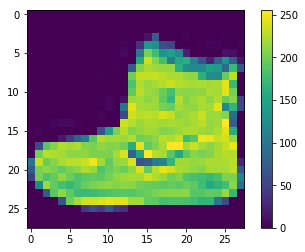

In [14]:
## lets look at an image and use matplotlib to plot the array values

# converts the numpy array to an image and displays it
plt.imshow(train_images[0])
# displays the image values 
plt.colorbar()
# displays the chart only - comment out to see what info it omits
plt.show()

In [0]:
# lets preprocess
train_images = train_images / 255.0 

# we need to do the same to the test and training set
test_images = test_images / 255.0

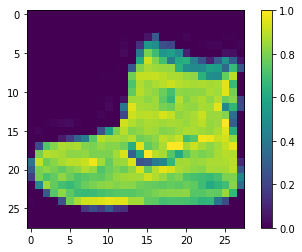

In [16]:
# lets look again at the pixel range 

plt.imshow(train_images[0])
plt.colorbar()
plt.show()

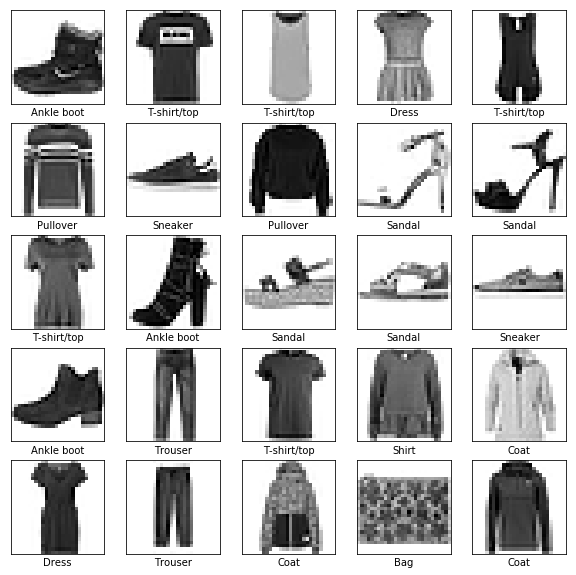

In [17]:
# now we have the class names, lets look at a selection of the images

# sets the size of the overall display for our images
plt.figure(figsize=(10,10))
# loops through the first 25 images
for i in range (25):
  # sets a location for each of the images
  plt.subplot(5,5,i+1)
  # removes the axis lables
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # displays the image 
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # plots the label, mapping the label to our list of clothing items
  plt.xlabel(class_names[train_labels[i]])
# displays the image and label
plt.show() 

**So, what did we cover in this section?**
* We looked at understanding and processing our data. 
* Specifically, we looked at data size and shape, rescaling our data, and splitting our data into training and test sets.

**How does it add to our existing knowledge?**
* This starts to add to the high level concepts we introduced in section 3.

**What else can I learn to improve my knowledge?**
* We touch briefly on how each array value represents a colour value. We will look at this in more detail in the next notebook. 
* There is more to learn on splitting training and tests. In later notebooks, we will add a validation set.

## 5. Model

![alt text](https://cdn-images-1.medium.com/max/1200/0*0mia7BQKjUAuXeqZ.jpeg)

**What is a deep learning model?**
* The image above ([credit](http://cs231n.github.io/neural-networks-1/)) sets out the main components of a deep learning model: 
  * an `input layer` that takes our data
  * an `output layer` that returns a value 
  * `hidden layers` that generate the parameters that will learn the mapping between inputs and outputs. * The hidden layers provide the depth to the model. 
  * the arrows, which represent the `connections` between the layers. Each arrow shows how a value from one layer will be passed to another. As the value is passed from one layer to another, its is multiplied by a **`weight`**, which is a **`learned parameter`**, to return a different value.
  * **`nodes`** in each of the layers that represent the **`activation functions`** within the model. An activation function is where the product of all the inputs and weights into the node are summed, along with a bias term (biases are also a learned parameter) and where an output value is returned dependent on the sort of activation function we choose. 
* We configure the model by setting the number of layers and defining what each layers does prior to training the model on our data.  

**How do we build Deep Learning Models?**
* In order to build a deep learning model, we can define the following hyperparameters: the number of layers, the size of layer, the type of layer, and the type of activation function in each layer.

**So layers are important?** 
* The building block of a neural network is the layer. Layers make up models as we can see from the diagram above.
* Layers extract representations from the data fed into them (taken from 'first CNN tutorial'). They contain the parameters (**`weights`** and **`biases`**) that our model learns to make predictions.  
* Given that the layer parameters are learned during train, our task in building a deep learning model is to ensure there is sufficient **`capacity`** in the model to learn the representations required to map between the input and output data. 
* This capacity is provided by the number of layers and the size of each layer (the number of parameters in each layer). 
* The larger the capacity, the more representations we can have. But we need to trade off the number of parameters with the dangers of overfitting, or developing a model that is too specific to the training data and doesn't perform well on unseen data. (We will look at overfitting later) 

**What about layer type?**
* Layers perform a set of mathematical operations on the data. The sort of operations change depending on what representations we want and define with the code. We will use **`dense`**, or **`fully connected`**, layers in this tutorial, and **`convolutional`** layers in the following tutorials. 
* These different layers are best suited to different tasks within the mode, as we will see in these notebooks.

**So its just layers?**
* No, we also define **`activation functions.`** These take input values (which will be the product of the output values of the previous layer and the weight parameter), sum them together and produce an output value. The value returned will depend on the type of activation function selected. 
* The output layer will usually have a different activation function to the rest of the model, one that will be based on the required output of the model.

**That's a lot to take in...**
* It is. But these tutorials will set out some good guidelines. We will learn that:
  * Convolutional layers are good for extracting representations from image data, while dense layers are better suited for classifying those representation by mapping them to the outputs.
  * An effective activation function for the dense hidden layers is **`Relu`**. 
  * An effective activation function for the output layer is **`Softmax`**.

**How do we build a model in Tensorflow 2.0?**
* There are a number of ways to build models in **`tensorflow 2.0`**. 
* Most straightforward is using the **`sequential API`**. We will use this to develop our models. 
* We can also use the **`functional API`** and a technique known as **`sub-classing`**. We will explore these in the advanced notebooks as they offer benefits over the sequential API if you want to build certain sorts of model.
* We will develop out first model below. As you will see - and this holds true for a lot of deep learning - the code required to implement complex ideas that require a lot of explanation is pretty small.

In [0]:
# here we instantiate a Sequential model 
# note that are passing in the layers as a list
model = keras.Sequential([
    # the input / flatten layer changes the input shape to a 1D array of 28x28 size 
    keras.layers.Flatten(input_shape=(28,28)),
    # here we define the hidden / Dense layer. We specify the number of nodes - 128 - and the activatin function - relu
    keras.layers.Dense(128, activation='relu'),
    # we define the output / Dense layer with 10 nodes for 10 classes, and a softmax to return an array of 10 probability scores that sum to 1
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
# ability to print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**How do we arrive at the number of parameters?**
* Our first layer has 784 output parameters (28 x 28). Each of those outputs get passed to each of the nodes in the next layer (784 x 128). We also have a bias term for each node (128) giving us 100,480 learnable parameters.

> *Its worth reinforcing that, in a dense layer, every output value gets passed to every input node in the next layer. The thing that is different is the weight applied to that value, which will be different - or has the potential to be different given that this is a learned parameter. Therefore, in this instance, each node in the hidden layer will receive 784 values from the previous layer, which will have been modified by a learned weight parameter. To this, we will also add one bias term, making 785 learnable parameters.*


---

* Take the time to be comfortable with howe arrived at 1290 parameters for the output layer. 



**So, what did we cover in this section?**
* The building blocks of deep learning models: layers (size, shape, type) and activation functions. 
* How to build a model using the **` keras sequential API`**, specifically using a list

**How does it add to our existing knowledge?**
* This starts to add to the high level concepts we introduced in section 3.

**What else can I learn to improve my knowledge?**
* *Advanced Notebook 2: Models and Layers* covers model building with the **`functional API`** and using **`subclassing`**. It also demonstrates the output of different layer types and activations functions. 
* We will cover other ways of creating a **`sequential`** model in the following notebooks.

## 6. Training the Model

**How do we train a model?**
* As per the chart in section 3, we training by making a **`forward pass`** and a **`backward pass`**.
* A **`forward pass`** means passing the inputs through the model and performing mathematical operations on the data as we defined in the model section to make predictions. 
* A **`backward pass`** means updating the weights and biases of our model based on the results of the predictions.
* To do this using **`tensorflow 2.0`**,  we will use the **`keras API`**. We first pass a **`.compile()`** method to our model, and then a **`.fit()`** method to our model.

**What is compiling?**
* Compiling means that we assign certain variables to our model that are important in the training process:
  * a **`loss function`**, which measures the distance between our predicted and actual classes. 
  * an **`optimizier`**, which updates the weights based on the backpropogation algorithm
  * a **`metric`** to provide an appropriate additional measure of training performance.  and an accuracy 
* This is not an exhaustive list of what we variables we can pass to the **`.compile()`** method. We will pass additional variables in the following notebooks. 


In [0]:
# we can see that this is a relatively easy thing to code

# we pass in the optimiser that we wish to use 
model.compile(optimizer='adam',
             # specify the loss function 
             loss='sparse_categorical_crossentropy',
             # and we specify our metrics  
             metrics=['accuracy'])

**What is fitting?**
* The **`.fit()`** method governs the training process. To fit our model to the data is to pass the data through the model and see how well it predicts what we want it to predict, and then to update the model based on these results - that is, **`.fit()`** implements the forward and backward pass based on the model and training variables we have defined.
* In the **`.fit()`** method, we get to define the number of **`epochs`** (the number of times we go through the data), and a number of other variables that we will cover in following notebooks. 

In [21]:
# we just pass the fit method to the model, along with training data and corresponding output data 
# We also specify the number of epochs  
history = model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5028 - accuracy: 0.8226
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3804 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3414 - accuracy: 0.8761
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3143 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2965 - accuracy: 0.8903


**What do the different parts of the training print out mean?**
* The left hand side shows the number of epochs we have performed. 
* For each epoch, we can see thow much of the training data we have used (its now 60000 / 60000 because training is over, but this figure changes as the data is loaded and passed through the model.)
* On the right hand side of the data, we can see: the time it has taken to complete the epoch; the loss for that epochm abd the accuracy for that epoch.

**How did we do?**
* On the face of it, 89% accuracy seems pretty good. Given this is a publicly available dataset, then we can search to see how others have done on it. We will also apply different models to this dataset to see if we can improve our accuracy. 
* We can see that our loss steadily reduced as the epochs increased, and the accuracy improved. This is a good sign and we would probably see further improvement if we ran the training for more epochs.
* The **`keras .fit()`** method returns a **`history`** object, which records the values of the training. We will explore this now and use it to easily plot these values.

In [22]:
# model.fit returns a history object, which contains a history dictionary about everything that happened during training 
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [23]:
# for example we can access the loss like this
history_dict['loss']

[0.5028488204081853,
 0.38043112778663635,
 0.3414043130079905,
 0.3143128943045934,
 0.29653516481320064]

In [24]:
## we can pass this to a pandas dataframe

# we need to import pandas
import pandas as pd

# pass history data to dataframe object
history_df = pd.DataFrame(history_dict)

# and display it 
history_df

,loss,accuracy
0,0.502849,0.822617
1,0.380431,0.863767
2,0.341404,0.876117
3,0.314313,0.885500
4,0.296535,0.890267


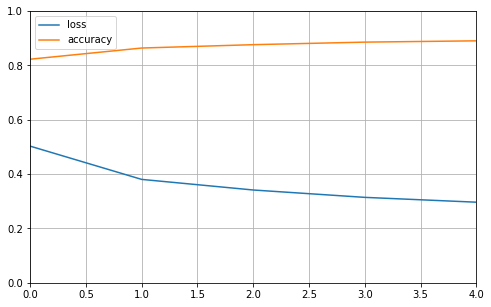

In [25]:
# we can use plot functionality of pandas to quickly plot our results
history_df.plot(figsize=(8,5))
# tailor our plot. Show the grid
plt.grid(True)
# set the vertical range to [0 -1]
plt.gca().set_ylim(0,1)
# display plot
plt.show()

**What does this show?**
* The chart shows the improvement in loss and accuracy values over the epochs.
* If we had used a validation set, we would be able to compare the values from the validation and training sets at each epoch, which would tell us a little more about how the model will be able to generalise to unseen data (we will look at this in next notebook).

**So, what did we cover in this section?**
* That we need to perform a forward and backward pass to do training in deep learning.
* That to do this in **`tensorflow 2.0`** is fairly easy using the **`keras API`**. We simply: 
  * pass a **`.compile()`** method to our model to define our **`loss`**, **`optimiser`** and **`metric`** variables
  * and pass the **`.fit()`** method to our model in order to set the number of training loops and govern other related behaviour of the training process. 

**How does it add to our existing knowledge?**
* This starts to add to the high level concepts we introduced in section 3.

**What else can I learn to improve my knowledge?**
* We will provide more detail about **`optimizers`**, **`loss functions`** and **`metrics`** in the following notebooks. 
* We will pass additional arguments to the **`.compile()`** and **`.fit()`** methods in the following notebooks. For example, we can add a validation set to our training loop, and we can record more information about our model performance.
* *Advanced Notebook 3: Training* covers training using custom training loops in **`tensorflow 2.0`**.

## 7. Evaluation and Inference 

**How do we know how we well the model is performing?**
* We have seen how the model performs on the training set, but we need to test it on unseen data to see how well the model really is peforming. 
* To do this we can call the **`.evaluate()`** method on the model and pass in our test set. This returns the loss and scoring metric that we passed in to the **`.compile()`** method (in this case, accuracy). 
* We can also use the **`.predict()`** method to make predictions on the test image. This method will return (in this instance) an array of 10 values, each representing a class label and the probability the model believes the passed in image is one of the 10 classes. 

In [26]:
# use the evaluate method
# it returns two values, the loss and accuracy from our model
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3509 - accuracy: 0.8752


In [27]:
# here we can print out the accuracy and loss
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.8752

Test loss: 0.35092480759620664


In [0]:
# use our model to make predictions
predictions = model.predict(test_images)

**What has been returned?**
* a prediction for each image. The prediction actually is a value against each of the 10 lablels for each image. This value is the probability the model has given that one of the 10 labels is correct for the unseen image.

In [29]:
# we can view the predictions for just one of the predictions  
predictions[0]

array([4.7996196e-05, 2.0464356e-07, 1.7739889e-05, 3.6743182e-07,
       7.4548348e-06, 8.4306277e-02, 2.2674954e-05, 2.8346610e-01,
       2.4183988e-04, 6.3188928e-01], dtype=float32)

**What is the predicted label?**
* The one with the highest probability. We can retrieve this using the np.argmax function

In [30]:
# get highest value of the predictions 
np.argmax(predictions[0])

9

**How can we compare this with the actual label?**


In [31]:
# we can use class_names to see what was the 9th label of the classes
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [32]:
# and the get our test_label
test_labels[0] == class_names[np.argmax(predictions[0])]

False

###7.1 Plotting our results

**How can we display our results?**
* We can use **`matplotlib`** to  display the results of our model.
* We will plot an image, what the predicted label is, and whether this was correct. We will also plot a bar chart showing the probability assigned by the model to the different classes. We start by defining some helper functions.

In [0]:
# define a function that plots the predicted image

def plot_image(i, predictions_array, true_label, img):
  # assign variable names to our parameters
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  # remove grid and axis values 
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # display images 
  plt.imshow(img, cmap=plt.cm.binary)
  # return predicted label
  predicted_label = np.argmax(predictions_array)
  # and assign it a colour based on whether it was correct
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  # define label format  
  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label],
                                     color=color))

In [0]:
# plot a function to graph the probabilities 

def plot_value_array(i, predictions_array, true_label):
  # assign variable names to our parameters
  predictions_array, true_label = predictions_array[i], true_label[i]
  # remove grid and axis values 
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # plot a bar chart
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  # reduce y axis to between 0,1 values 
  plt.ylim([0,1])
  # create prediction 
  predicted_label = np.argmax(predictions_array)
  # set plot colour
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Now let's use our functions to plot one image and a series of images together**


<function matplotlib.pyplot.show>

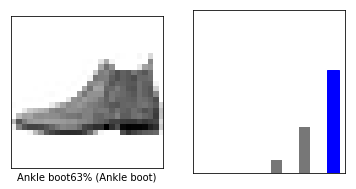

In [36]:
# look at the 0 image
i = 0
# set size of figure for the plot
plt.figure(figsize=(6,3))
# display image one side of the figure
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
# display chart on the other side of the figure
plt.subplot(1,2,2) 
plot_value_array(i, predictions, test_labels)
# show plot
plt.show

<function matplotlib.pyplot.show>

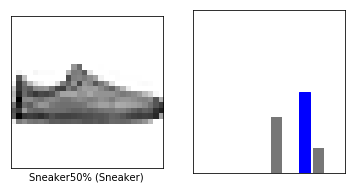

In [37]:
# look at the 12 image
i = 12
# as above 
plt.figure(figsize=(6,3))
# as above
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
# as above
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
# as above 
plt.show

**We can use this functionality to plot more than one image**

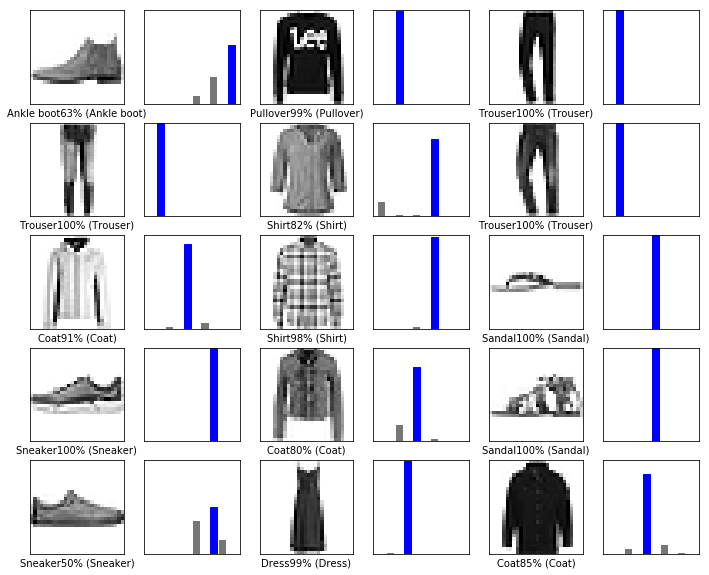

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### 7.2 Making a prediction on a single image

**Didn't we do this earlier?**
* No. We made predictions on the entire test set and then selected one of those predictions to view. Here we just want to make a prediction on one of the images.

In [0]:
# get an image from the test_dataset
img = test_images[0]

**We need to talk about batches...**
* We haven't encountered **`batch sizes`** yet. This a value that represents the number of images (or other data type if we aren't doing image classification) that are passed to the model. 
* In training, we pass a batch size and this represents how many images the model will make predictions on  before recording the loss and updating the model. In the example above, this value defualted to the entire dataset (60000).
* When making predictions with test (or other) images, **`tf.keras`** needs to make predictions on a batch. This means, it needs to understand how many images are about to passed to it. In practical terms, this means we need to add a batch dimension to the shape of our data.
* Getting the data into the right shape for modelling and predicting can be a bit tricky sometimes. The [Advanced Notebook: Tensors](link) covers this in more detail.

In [40]:
# lets looks at the shape of image before we add a batch dimension to it
print(img.shape)

(28, 28)


In [41]:
# add batch dimension by adding a dimension to the image shape
img = (np.expand_dims(img,0)) 
print(img.shape)

(1, 28, 28)


In [0]:
# make prediction
predictions_single = model.predict(img)

In [43]:
# show the array 
predictions_single

array([[4.7996196e-05, 2.0464375e-07, 1.7739940e-05, 3.6743148e-07,
        7.4548425e-06, 8.4306329e-02, 2.2674998e-05, 2.8346601e-01,
        2.4184045e-04, 6.3188928e-01]], dtype=float32)

In [44]:
# again we can use argmax
np.argmax(predictions_single[0])

9

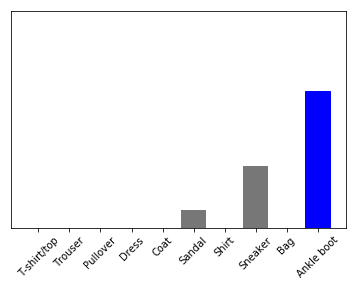

In [45]:
# and we can plot the result 
plot_value_array(0, predictions_single, test_labels)
#
_ = plt.xticks(range(10), class_names, rotation=45)

**So, what did we cover in this section?**
* The **`.evaluate()`** and **`.predict()`** methods for understanding how our models perform on unseen data.
* Plotting our results so that we can see how the model did
* Predicting the class of a single image by passing in a **`batch`** dimension to the image shape. 

**How does it add to our existing knowledge?**
* This starts to add to the high level concepts we introduced in section 3.

**What else can I learn to improve my knowledge?**
* We will cover batches further in notebook 2. 
* We will use the **`.evaluate()`** and **`.predict()`** methods in later notebooks too.

## 8. Summary

![alt text](https://github.com/DanRHowarth/Tensorflow-2.0/blob/master/Notebook%201%20-%20Summary_final.png?raw=true)

**What have we learnt?**
* We can see from the chart above, quite a lot.
* We have introduced core Deep Learning concepts, explained them in high level terms, and put them in to practice by writing code.
* If you feel like this was a lot, don't worry because it was! It is a lot to take in. Let's end with the opportunity to build and train your own model!

## 9. Exercise

* The best way to learn code is to write it out for yourself. Take the opportunity to reinforce what you have learnt by adding code cells below and doing the following:

**Fit the model**
* Change the number of epochs when you **`.fit()`** the model again and see how performance changes.

**Build a new model**
* Create a new model and:
  * add an additional layer; and/or:
  * add more nodes to the hidden layer(s)
* You will need to recompile the model, which means adding the **`.compile()`** method to the new model and passing in the arguments we set out above.

**Good luck!**